# Big Data Mart Sales

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, we will try to understand the properties of products and stores which play a key role in increasing the sales of their products.

In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import joblib
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from scipy.stats import zscore
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import OrdinalEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('bigmart_train.csv')
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [3]:
#checking the data dimension
df.shape

(8523, 12)

In [4]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [5]:
#checking the datatypes of each column
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [6]:
#checking the null values
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
#filling the null values with mean,median or mode
df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].median())


In [8]:
df['Outlet_Size'] = df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0])

In [9]:
#checking the null values
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

>Doing the encoding to make the data in numeric form

In [10]:
enc=OrdinalEncoder()

for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [11]:
df.dtypes

Item_Identifier              float64
Item_Weight                  float64
Item_Fat_Content             float64
Item_Visibility              float64
Item_Type                    float64
Item_MRP                     float64
Outlet_Identifier            float64
Outlet_Establishment_Year      int64
Outlet_Size                  float64
Outlet_Location_Type         float64
Outlet_Type                  float64
Item_Outlet_Sales            float64
dtype: object

In [12]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156.0,9.300,1.0,0.016047,4.0,249.8092,9.0,1999,1.0,0.0,1.0,3735.1380
1,8.0,5.920,2.0,0.019278,14.0,48.2692,3.0,2009,1.0,2.0,2.0,443.4228
2,662.0,17.500,1.0,0.016760,10.0,141.6180,9.0,1999,1.0,0.0,1.0,2097.2700
3,1121.0,19.200,2.0,0.000000,6.0,182.0950,0.0,1998,1.0,2.0,0.0,732.3800
4,1297.0,8.930,1.0,0.000000,9.0,53.8614,1.0,1987,0.0,2.0,1.0,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370.0,6.865,1.0,0.056783,13.0,214.5218,1.0,1987,0.0,2.0,1.0,2778.3834
8519,897.0,8.380,2.0,0.046982,0.0,108.1570,7.0,2002,1.0,1.0,1.0,549.2850
8520,1357.0,10.600,1.0,0.035186,8.0,85.1224,6.0,2004,2.0,1.0,1.0,1193.1136
8521,681.0,7.210,2.0,0.145221,13.0,103.1332,3.0,2009,1.0,2.0,2.0,1845.5976


>Visualization of the dataset

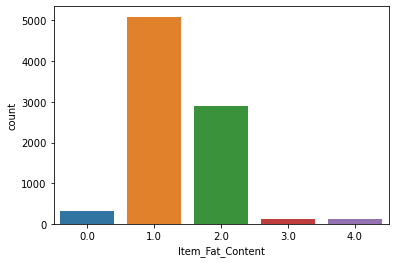

In [13]:
sns.countplot(x='Item_Fat_Content',data=df)
plt.show()

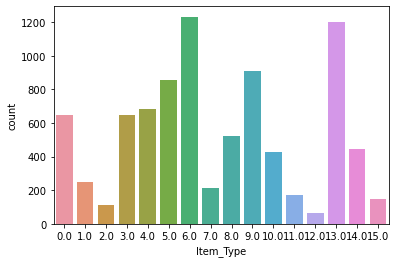

In [14]:
sns.countplot(x='Item_Type',data=df)
plt.show()

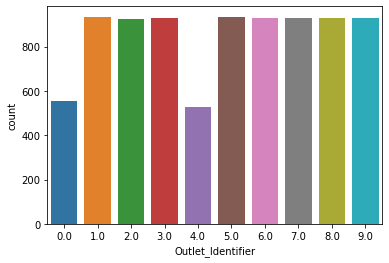

In [15]:
sns.countplot(x='Outlet_Identifier',data=df)
plt.show()

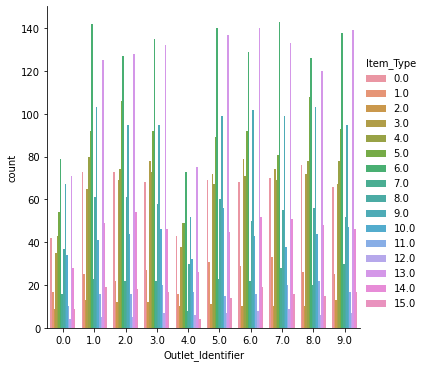

In [16]:
sns.catplot(x ="Outlet_Identifier", hue ="Item_Type",  kind ="count", data = df) 

>through the above graph we can see what are the quantity of item present in each outlet

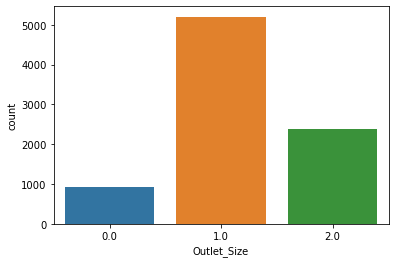

In [17]:
sns.countplot(x='Outlet_Size',data=df)
plt.show()

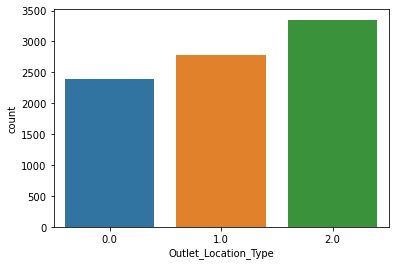

In [18]:
sns.countplot(x='Outlet_Location_Type',data=df)
plt.show()

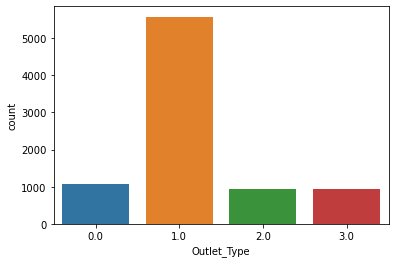

In [19]:
sns.countplot(x='Outlet_Type',data=df)
plt.show()

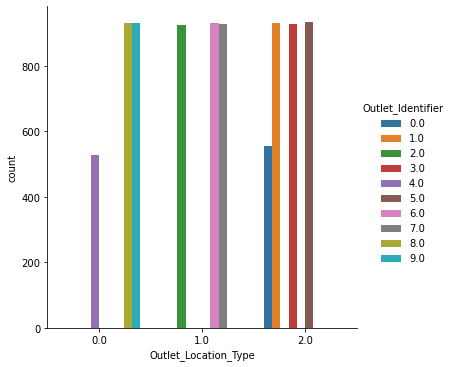

In [20]:
sns.catplot(x ="Outlet_Location_Type", hue ="Outlet_Identifier",  kind ="count", data = df) 

>Through the above graph we can see which outlet is in which location tier.

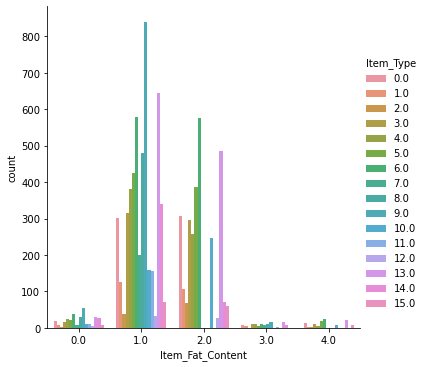

In [21]:
sns.catplot(x ="Item_Fat_Content", hue ="Item_Type",  kind ="count", data = df) 

>Through the above graph we can see what is the fat content of each item type

<AxesSubplot:xlabel='Outlet_Establishment_Year'>

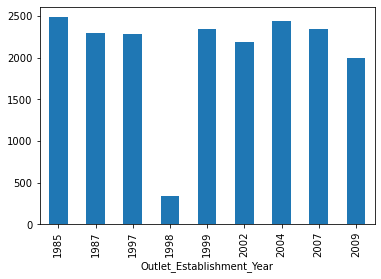

In [22]:
df.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].mean().plot.bar()

<AxesSubplot:xlabel='Outlet_Type'>

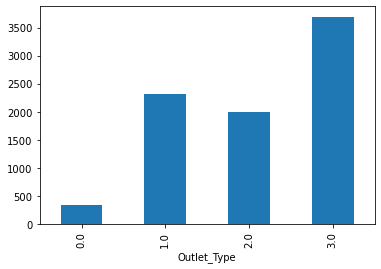

In [23]:
df.groupby('Outlet_Type')['Item_Outlet_Sales'].mean().plot.bar()

<AxesSubplot:xlabel='Outlet_Location_Type'>

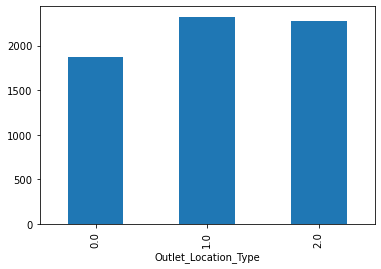

In [24]:
df.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].mean().plot.bar()

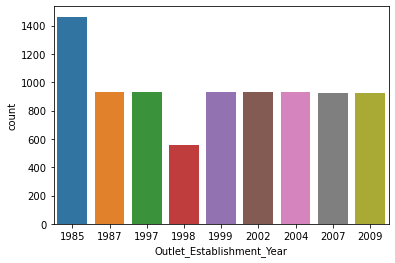

In [25]:
sns.countplot(x='Outlet_Establishment_Year',data=df)
plt.show()

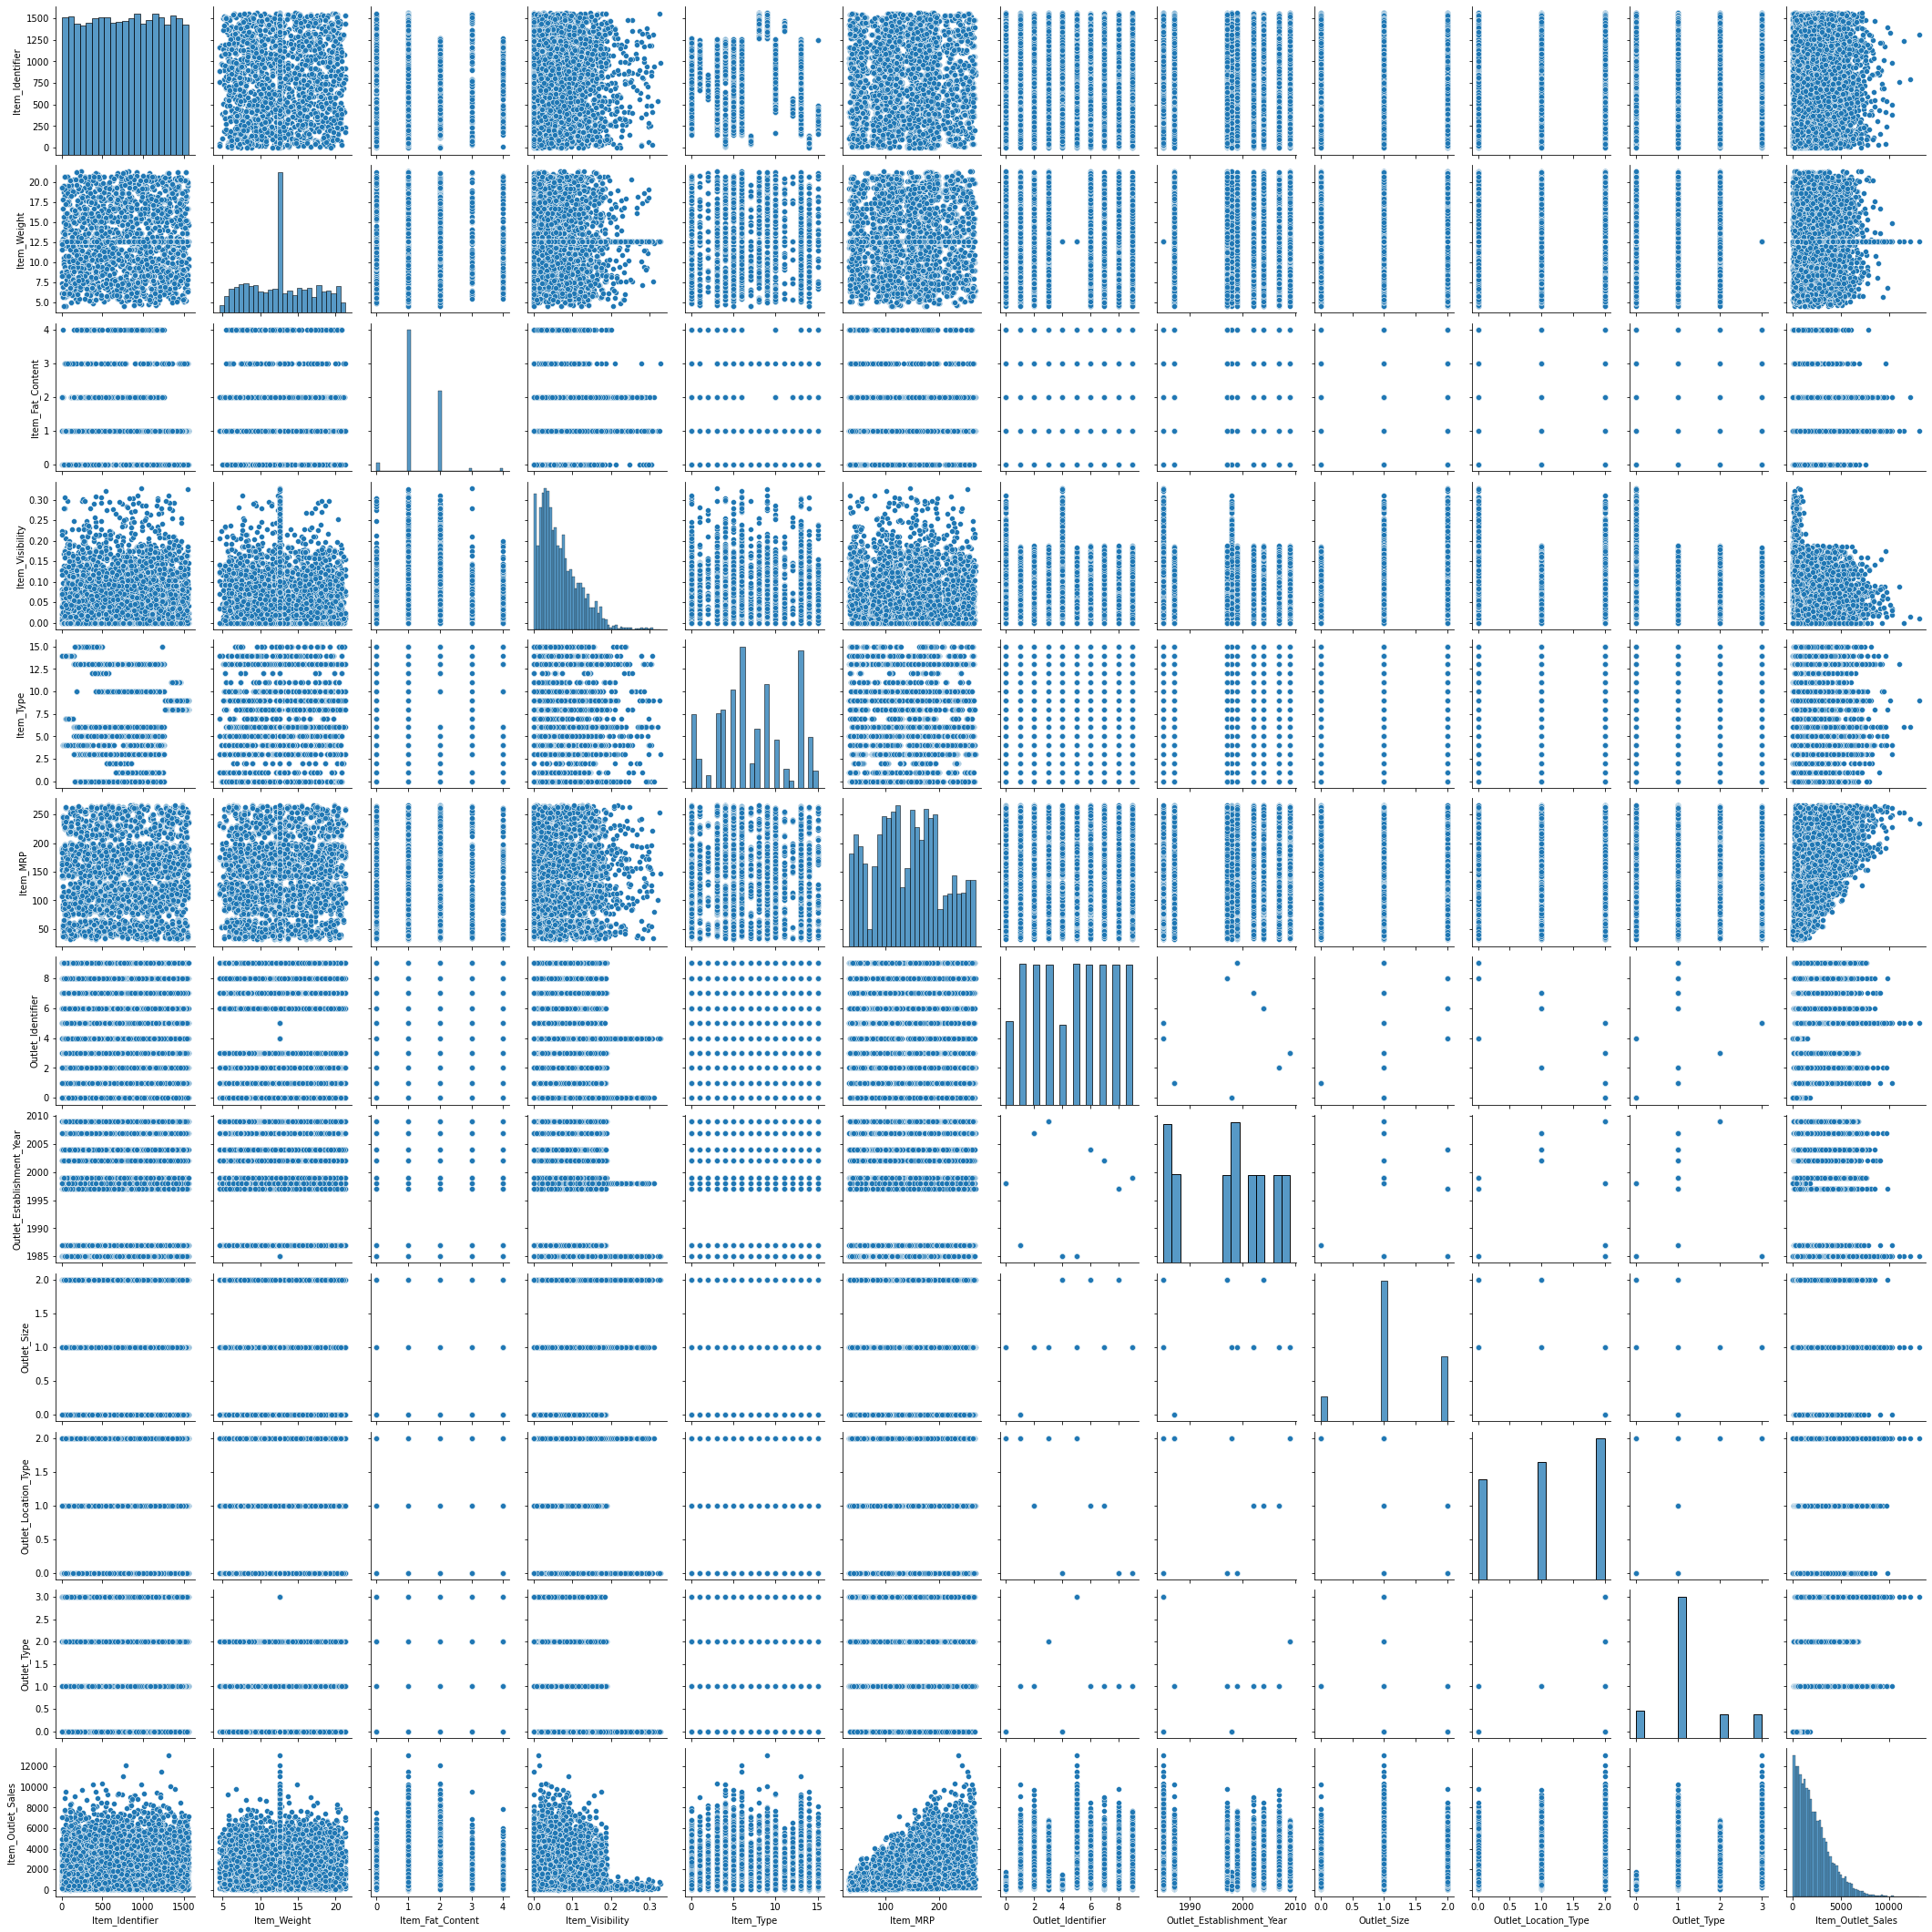

In [26]:
sns.pairplot(df)

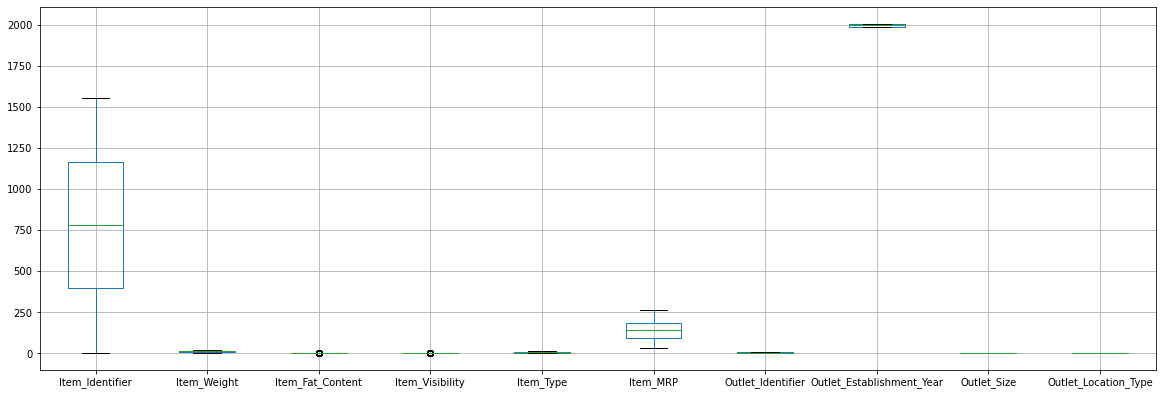

In [27]:
#checking the outliers
df.iloc[:,0:10].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

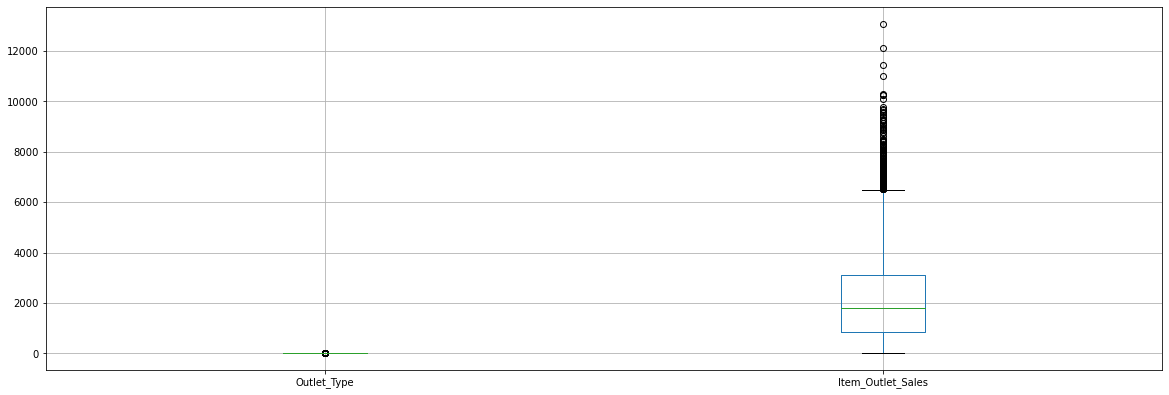

In [28]:
#checking the outliers
df.iloc[:,10:13].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

>As we can see through the above 2 plots that their are no considerable outliers present in the dataset.

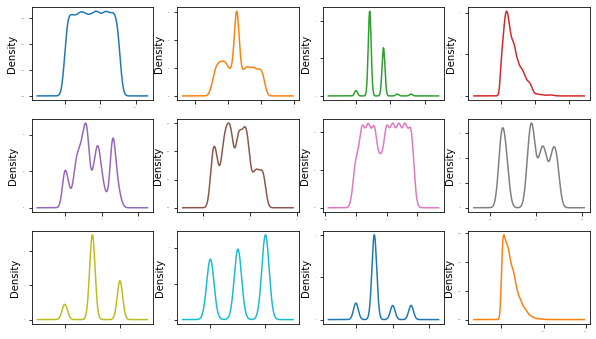

In [29]:
df.plot(kind='density',subplots=True,  layout=(6,4), sharex=False, legend=False, fontsize=1, figsize=(10,12))
plt.show()

In [30]:
#checking the skewness of the data
df.skew()

Item_Identifier             -0.008877
Item_Weight                  0.121845
Item_Fat_Content             0.994824
Item_Visibility              1.167091
Item_Type                    0.101655
Item_MRP                     0.127202
Outlet_Identifier           -0.059861
Outlet_Establishment_Year   -0.396641
Outlet_Size                 -0.087072
Outlet_Location_Type        -0.209093
Outlet_Type                  0.927438
Item_Outlet_Sales            1.177531
dtype: float64

In [31]:
df["Item_Visibility"]=np.sqrt(df["Item_Visibility"])

In [32]:
df.skew()

Item_Identifier             -0.008877
Item_Weight                  0.121845
Item_Fat_Content             0.994824
Item_Visibility             -0.098056
Item_Type                    0.101655
Item_MRP                     0.127202
Outlet_Identifier           -0.059861
Outlet_Establishment_Year   -0.396641
Outlet_Size                 -0.087072
Outlet_Location_Type        -0.209093
Outlet_Type                  0.927438
Item_Outlet_Sales            1.177531
dtype: float64

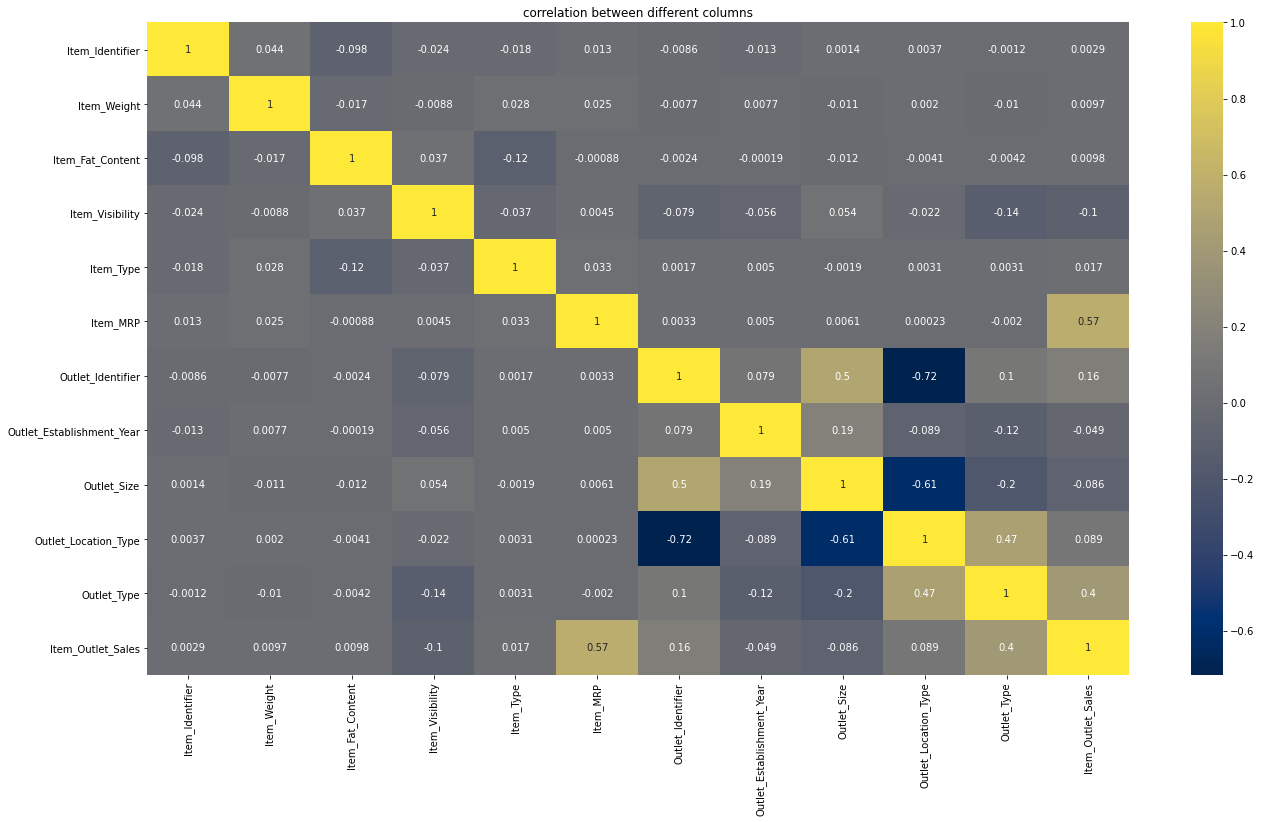

In [33]:
corr_df= df.corr()

plt.figure(figsize=[22,12])
sns.heatmap(corr_df,cmap="cividis",annot=True)
plt.title('correlation between different columns')
plt.show()

>As we can see through the above heatmap that 'item MRP' and 'outlet type' is the most positively correlated columns to the 'item outlet sales' column.

In [34]:
#splitting the dataset into independent and target variables in x and y respectively

x=df.drop('Item_Outlet_Sales', axis=1)
y=df['Item_Outlet_Sales']

In [35]:
x

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156.0,9.300,1.0,0.126678,4.0,249.8092,9.0,1999,1.0,0.0,1.0
1,8.0,5.920,2.0,0.138846,14.0,48.2692,3.0,2009,1.0,2.0,2.0
2,662.0,17.500,1.0,0.129461,10.0,141.6180,9.0,1999,1.0,0.0,1.0
3,1121.0,19.200,2.0,0.000000,6.0,182.0950,0.0,1998,1.0,2.0,0.0
4,1297.0,8.930,1.0,0.000000,9.0,53.8614,1.0,1987,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
8518,370.0,6.865,1.0,0.238293,13.0,214.5218,1.0,1987,0.0,2.0,1.0
8519,897.0,8.380,2.0,0.216754,0.0,108.1570,7.0,2002,1.0,1.0,1.0
8520,1357.0,10.600,1.0,0.187580,8.0,85.1224,6.0,2004,2.0,1.0,1.0
8521,681.0,7.210,2.0,0.381078,13.0,103.1332,3.0,2009,1.0,2.0,2.0


In [36]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [37]:
#checking the best random state
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"At random state {i}, the training accuracy is:- {r2_score(y_train,pred_train)}")
    print(f"At random state {i}, the testing accuracy is:- {r2_score(y_test,pred_test)}")
    print("\n")

At random state 0, the training accuracy is:- 0.5091204269548687
At random state 0, the testing accuracy is:- 0.5120832304006


At random state 1, the training accuracy is:- 0.5098793951159942
At random state 1, the testing accuracy is:- 0.5082951861324548


At random state 2, the training accuracy is:- 0.5136255268417834
At random state 2, the testing accuracy is:- 0.4939313361394061


At random state 3, the training accuracy is:- 0.5008952681712309
At random state 3, the testing accuracy is:- 0.5437733438006751


At random state 4, the training accuracy is:- 0.5121614988574822
At random state 4, the testing accuracy is:- 0.4977694214868168


At random state 5, the training accuracy is:- 0.511707892794971
At random state 5, the testing accuracy is:- 0.5014706728522003


At random state 6, the training accuracy is:- 0.5099363668644967
At random state 6, the testing accuracy is:- 0.5079339926897393


At random state 7, the training accuracy is:- 0.5136691541172951
At random state 7, the

At random state 62, the training accuracy is:- 0.5037243663000286
At random state 62, the testing accuracy is:- 0.5326475280426762


At random state 63, the training accuracy is:- 0.5041283545127773
At random state 63, the testing accuracy is:- 0.5325274196708849


At random state 64, the training accuracy is:- 0.514276492297888
At random state 64, the testing accuracy is:- 0.4908481399302739


At random state 65, the training accuracy is:- 0.5081227414063971
At random state 65, the testing accuracy is:- 0.514845384164917


At random state 66, the training accuracy is:- 0.5109056803699237
At random state 66, the testing accuracy is:- 0.5050675236076192


At random state 67, the training accuracy is:- 0.5089488240572487
At random state 67, the testing accuracy is:- 0.5123593193700631


At random state 68, the training accuracy is:- 0.508662579803232
At random state 68, the testing accuracy is:- 0.51298591252252


At random state 69, the training accuracy is:- 0.5106326162990054
At rando

>From the above stats, at random state 3 the testing accuracy and training accuracy is hightest.

>Testing the best Random State in different algorithms

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=3)

In [39]:
model=[LinearRegression(),SVR(),RandomForestRegressor(),DecisionTreeRegressor()]

In [40]:
for n in model:
    n.fit(x_train,y_train)
    n.score(x_train,y_train)
    predm=n.predict(x_test)
    print('r2 score of',n,'is:')
    print(r2_score(y_test,predm))
    print(mean_squared_error(y_test,predm))
    print(mean_absolute_error(y_test,predm))
    print('\n')

r2 score of LinearRegression() is:
0.5437733438006751
1358542.450846274
877.6220271424602


r2 score of SVR() is:
-0.04831750218752329
3121658.5206820043
1314.808187590946


r2 score of RandomForestRegressor() is:
0.5900203423867576
1220829.0797626453
773.4736680281524


r2 score of DecisionTreeRegressor() is:
0.20888091810059928
2355778.2997346404
1068.0373101466275




>Now checking cross validation score to check whether our models are overfitted or underfitted.

In [41]:
scrli=cross_val_score(LinearRegression(),x,y, cv=5)
print('cross validation score of linearregression: ',scrli.mean())

cross validation score of linearregression:  0.5073241699466691


In [42]:
scrrf=cross_val_score(RandomForestRegressor(),x,y, cv=5)
print('cross validation score of RandomForestregression: ',scrrf.mean())

cross validation score of RandomForestregression:  0.552383109107945


In [43]:
scrdtr=cross_val_score(DecisionTreeRegressor(),x,y, cv=5)
print('cross validation score of DecisionTreeregression: ',scrdtr.mean())

cross validation score of DecisionTreeregression:  0.1510567887105198


In [44]:
scrsvr=cross_val_score(SVR(),x,y, cv=5)
print('cross validation score of SVR: ',scrsvr.mean())

cross validation score of SVR:  -0.04863329358256867


>Minimum difference in r2 score and cross validation score is for Linear Regression and Random Forest Regression (3) so they are our best model

>We are using Random Forest Regressor

>Doing GridSearchCV for getting best parameters

In [45]:
param_grid = {  'bootstrap': [True], 'max_depth': [5, 10, None], 'max_features': ['auto', 'log2'], 'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15],}

In [46]:
GCV=GridSearchCV(RandomForestRegressor(), param_grid,  cv = 3,)

In [47]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True], 'max_depth': [5, 10, None],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]})

In [48]:
#getting the best parameters found by GridSearchCV
GCV.best_params_

{'bootstrap': True, 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 10}

In [49]:
GCV_pred=GCV.best_estimator_.predict(x_test)

In [50]:
r2_score(y_test,GCV_pred,)

0.6277150327277687

In [51]:
joblib.dump(GCV.best_estimator_,'BigDataMartSales.obj')

['BigDataMartSales.obj']

>Using the test Dataset

In [52]:
#loading the test data
test_df=pd.read_csv('bigmart_test.csv')

In [53]:
test_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [54]:
#checking the data dimension
test_df.shape 

(5681, 11)

In [55]:
#checking the null values in the dataset
test_df.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [56]:
#Replacing the null values with the mean,median or mode
test_df['Item_Weight'] = test_df['Item_Weight'].fillna(test_df['Item_Weight'].median())

In [57]:
test_df['Outlet_Size'] = test_df['Outlet_Size'].fillna(test_df['Outlet_Size'].mode()[0])


In [58]:
test_df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

>Doing the encoding to make the data in numeric form

In [59]:
enc=OrdinalEncoder()

for i in test_df.columns:
    if test_df[i].dtypes=='object':
        test_df[i]=enc.fit_transform(test_df[i].values.reshape(-1,1))

In [60]:
test_df.dtypes

Item_Identifier              float64
Item_Weight                  float64
Item_Fat_Content             float64
Item_Visibility              float64
Item_Type                    float64
Item_MRP                     float64
Outlet_Identifier            float64
Outlet_Establishment_Year      int64
Outlet_Size                  float64
Outlet_Location_Type         float64
Outlet_Type                  float64
dtype: object

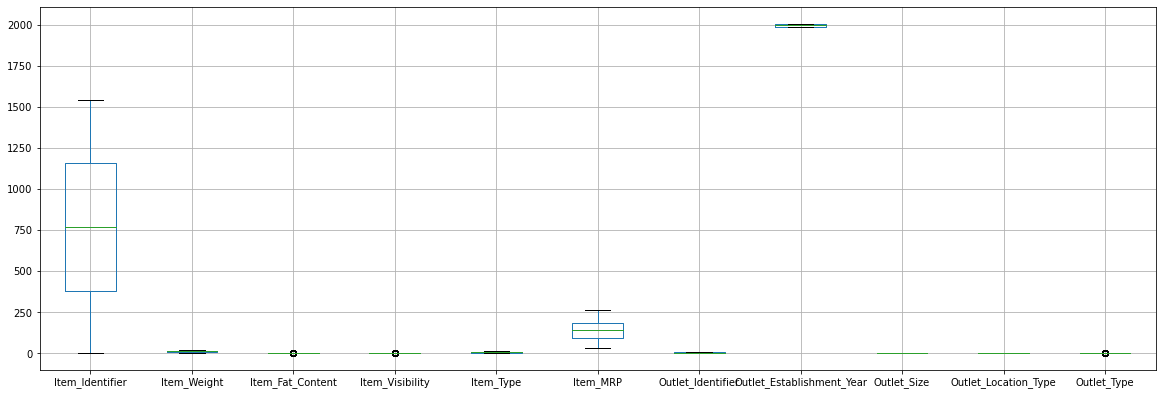

In [61]:
#checking the outliers
test_df.iloc[:,0:12].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

>As we can see through the above plot that their are no considerable outliers present in the dataset

In [62]:
#checking the skewness in the dataset
test_df.skew()

Item_Identifier             -0.000020
Item_Weight                  0.166489
Item_Fat_Content             0.999629
Item_Visibility              1.238312
Item_Type                    0.096486
Item_MRP                     0.136182
Outlet_Identifier           -0.060209
Outlet_Establishment_Year   -0.396306
Outlet_Size                 -0.087108
Outlet_Location_Type        -0.209049
Outlet_Type                  0.927446
dtype: float64

In [63]:
test_df["Item_Visibility"]=np.sqrt(test_df["Item_Visibility"])

In [64]:
test_df.skew()

Item_Identifier             -0.000020
Item_Weight                  0.166489
Item_Fat_Content             0.999629
Item_Visibility             -0.094941
Item_Type                    0.096486
Item_MRP                     0.136182
Outlet_Identifier           -0.060209
Outlet_Establishment_Year   -0.396306
Outlet_Size                 -0.087108
Outlet_Location_Type        -0.209049
Outlet_Type                  0.927446
dtype: float64

In [65]:
#loading the model
model=joblib.load('BigDataMartSales.obj')

In [66]:
model

RandomForestRegressor(max_depth=5, n_estimators=10)

In [67]:
predictions=model.predict(test_df)

In [71]:
pd.set_option('display.max_columns', None)

In [72]:
predictions

array([1663.42861672, 1349.13549488,  549.50080538, ..., 1853.54072783,
       3603.69417394, 1210.97096294])

In [73]:
prediction=pd.DataFrame(predictions,columns=['prediction'])

In [74]:
prediction

,prediction
0,1663.428617
1,1349.135495
2,549.500805
3,2433.139824
4,5901.862480
5,1853.540728
6,688.270957
7,2061.685016
8,1569.651489
9,3093.856527
